In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [21]:
# X: (Feature 1, Feature 2)
X = np.array([[5, 40], 
              [8, 82], 
              [6, 52]], dtype=float)

# y: Target
y = np.array([[15], [24], [18]], dtype=float)

# Scaling units
X = X/np.max(X, axis=0) # maximum of X array
y = y/max(y) # maximum of y array

# Defining a neural network class holding all its components
class Neural_Network(object):
    def __init__(self):
        # Parameters
        self.inputSize = 2 # Two nodes
        self.outputSize = 1 # Single node
        self.hiddenSize = 3 # Three nodes

        # Weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def forward(self, X):
        #forward propagation through our network
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3) # final activation function
        return o 

    def sigmoid(self, s):
        # activation function 
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def backward(self, X, y, o):
        # backward propgate through the network
        self.o_error = y - o # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train (self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)

NN = Neural_Network()

loss = []
epochs = 400
for i in range(epochs): # trains the NN equal to epochs
    loss.append(np.mean(np.square(y - NN.forward(X))))
    NN.train(X, y)


0.01580533658283595

<IPython.core.display.Javascript object>


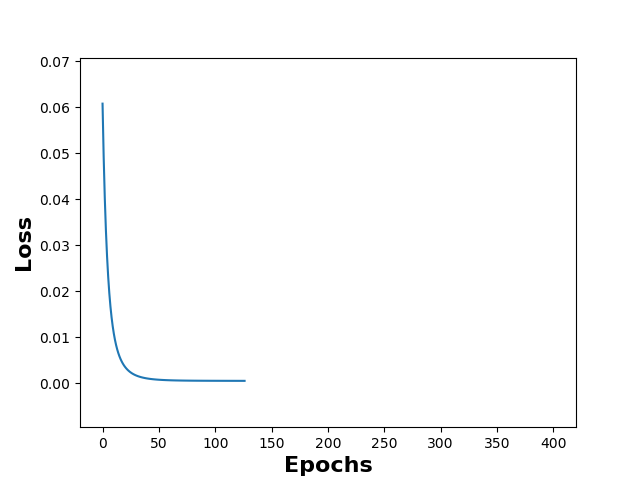

In [7]:
# Visualizing the loss in real-time
fig, ax = plt.subplots()
ax.axis([-20, epochs + 20, loss[-1] - 0.01, loss[0] + 0.01])
l, = ax.plot([],[])
ax.set_xlabel('Epochs', weight='bold', fontsize=16)
ax.set_ylabel('Loss', weight='bold', fontsize=16)
    
animation.FuncAnimation(fig, lambda i: l.set_data(range(len(loss))[:i], loss[:i]), frames=epochs)